In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr

from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score


%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

In [3]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

In [4]:
train.reindex(np.random.permutation(train.index))
test.reindex(np.random.permutation(test.index))

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
65227,test_65227,5.3872,1.1918,15.4833,6.8663,14.6549,-9.2332,7.0621,12.3009,-0.8299,...,-2.1063,7.0467,2.4384,-1.4775,14.7498,0.6343,5.3342,7.8986,18.3733,-8.8820
97149,test_97149,8.2836,-5.8865,14.1182,4.0175,10.1841,-13.7630,3.6280,15.6575,-3.2051,...,7.4844,5.1927,0.6992,3.4887,21.2651,0.9376,-0.2984,8.2961,18.7028,-4.2942
172943,test_172943,10.1963,0.1748,8.2442,8.2869,12.4547,-20.3219,3.7581,15.4284,4.4019,...,-2.1333,4.6558,0.7474,-1.4664,22.1867,-2.6320,9.9021,8.0357,18.1440,-13.8812
82654,test_82654,11.1806,3.8046,9.4789,5.2957,9.2146,-6.0574,4.5257,15.7313,-0.7101,...,-1.6211,14.3012,-0.1314,3.4395,13.1571,1.0121,-0.0743,9.7320,15.7314,5.0205
175738,test_175738,6.1090,-3.1039,8.1605,7.9061,9.6491,-14.4419,4.0656,22.9113,4.8921,...,7.6425,9.4276,0.6621,5.5777,21.7795,-1.2761,5.7115,9.5903,15.3734,-16.5216
199176,test_199176,13.8635,-4.3825,8.7728,7.1434,8.5100,-10.7707,3.7151,23.9593,3.2418,...,2.8617,3.1770,3.4777,4.6353,17.0751,2.7754,-4.7882,8.1681,19.2109,-7.5044
20286,test_20286,8.3009,-6.9905,9.6034,9.6019,10.7506,-15.1446,4.6690,17.7354,0.4970,...,1.9590,11.3532,1.3135,-1.0410,17.7413,0.5824,-4.4765,6.7119,14.7958,5.9706
5716,test_5716,12.2744,0.9442,8.7468,7.5062,10.5401,10.0025,7.4101,20.9670,3.6896,...,5.7719,6.8104,1.0983,5.5065,21.8256,-1.1638,-3.2903,8.5073,17.4410,2.7575
16812,test_16812,7.5667,-6.5102,16.7212,7.2974,12.3371,-10.3980,4.4362,20.0130,-4.3257,...,-0.3661,8.6360,1.3260,4.8051,14.7473,-0.0474,4.8132,7.9756,16.0009,8.5803
68823,test_68823,11.6635,1.0961,17.5427,6.5585,11.0701,-21.5425,5.6715,17.6257,-2.6318,...,-2.1756,6.9559,1.6559,8.3168,19.2851,-2.0434,-2.1960,7.9998,14.6182,-3.1256


In [5]:
#creating matrices for sklearn:
X_train = train.drop('target', 1).drop('ID_code', 1)
X_test = test.drop('ID_code', 1)
y = train.target

In [6]:
import xgboost as xgb

In [7]:
dtrain = xgb.DMatrix(X_train.head(1000), label=y.head(1000))
dtest = xgb.DMatrix(X_test.head(1000))

params = {"max_depth":4, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

/home/tblain/.local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/tblain/.local/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


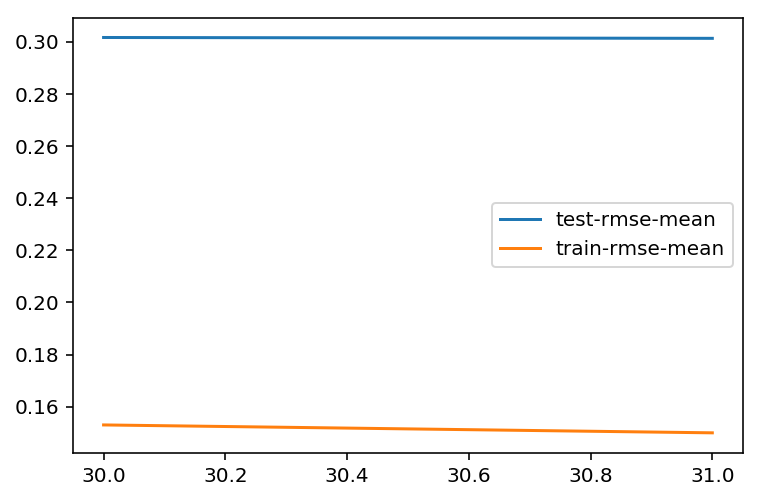

In [8]:
model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()

In [12]:
model_xgb = xgb.XGBRegressor(n_estimators=3600, max_depth=4, learning_rate=0.1) #the params were tuned using xgb.cv

In [13]:
model_xgb.fit(X_train.head(1000), y.head(1000))

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=3600, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [108]:
xgb_preds = np.expm1(model_xgb.predict(X_test))
# lasso_preds = np.expm1(model_lasso.predict(X_test))
# ridge_preds = np.expm1(model_ridge.predict(X_test))

In [109]:
preds = xgb_preds

In [110]:
solution = pd.DataFrame({"ID_code":test.ID_code, "target":preds})
solution.to_csv("sub.csv", index = False)